# Optimización Multiobjetivo con Deep Embedding Clustering (DEC)

En esta notebook se presenta un enfoque para resolver un problema de optimización multiobjetivo. Los principales objetivos son:

1. **Realizar una limpieza exhaustiva y preparación adecuada de los datos**, garantizando la calidad y coherencia del conjunto utilizado.
2. **Aplicar un modelo de Deep Embedding Clustering (DEC)**, lo que permitirá identificar patrones y diferenciar comportamientos significativos.

El objetivo final es facilitar la automatización de decisiones basadas en la identificación precisa de distintos grupos o clusters de comportamiento.


importo el csv

In [1]:
#read csv pandas 
import pandas as pd

#read csv file

df = pd.read_csv('df final.csv')

In [2]:
df

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora
0,139345,85784,35530241,12,539.53,539.53,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6
1,139345,122162,35530242,12,468.56,468.56,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6
2,139345,122162,35530243,12,780.94,780.94,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6
3,139345,122162,35530244,12,312.37,312.37,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6
4,139345,123763,35530245,12,817.48,817.48,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5
8015063,162271,742470,44299052,2,810.44,810.44,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5


In [3]:
#read csv pandas 
import pandas as pd

#read csv file

df1 = pd.read_csv('CatEmisora(in).csv')

In [4]:
df1

,idEmisora,Nombre,IdBanco,Emisora,TipoEnvio
0,1,BANAMEX CLABE TRADICIONAL,2,NoAplica,TRADICIONAL
1,2,BANAMEX CUENTA,2,NoAplica,CUENTA
2,3,BANAMEX TARJETA,2,NoAplica,TARJETA
3,4,BANAMEX INTERBANCARIO,2,NoAplica,INTERBANCARIO
4,5,BANAMEX TRADICIONAL REINTENTO,2,NoAplica,TRADICIONAL
5,6,BBVA TRADICIONAL REINTENTO,12,REINTENTO,TRADICIONAL
6,7,BANORTE TRADICIONAL REINTENTO,72,REINTENTO,TRADICIONAL
7,8,SANTANDER TRADICIONAL REINTENTO,14,REINTENTO,TRADICIONAL
8,9,SANTANDER CLABE TRADICIONAL,14,623,TRADICIONAL
9,10,SANTANDER CUENTA,14,623,TRADICIONAL


empezamos con un unión de los DataFrames df y df1 para tener mas información.

In [5]:
import pandas as pd

# Asegúrate que idEmisora existe en ambos DataFrames.
df2 = df.merge(df1[['idEmisora', 'TipoEnvio', 'Emisora']], on='idEmisora', how='left')


In [6]:
df2

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora,TipoEnvio,Emisora
0,139345,85784,35530241,12,539.53,539.53,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6,TRADICIONAL,REINTENTO
1,139345,122162,35530242,12,468.56,468.56,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6,TRADICIONAL,REINTENTO
2,139345,122162,35530243,12,780.94,780.94,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6,TRADICIONAL,REINTENTO
3,139345,122162,35530244,12,312.37,312.37,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6,TRADICIONAL,REINTENTO
4,139345,123763,35530245,12,817.48,817.48,0.0,NaN,4.0,01/03/2024 9:51AM,12,1/3/2024,6,TRADICIONAL,REINTENTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5,TRADICIONAL,NoAplica
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5,TRADICIONAL,NoAplica
8015063,162271,742470,44299052,2,810.44,810.44,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5,TRADICIONAL,NoAplica
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,NaN,4.0,22/05/2025 12:10PM,2,22/05/2025,5,TRADICIONAL,NoAplica


Se Cambia la variable fechas o horas por variables numericas para luego convertila en variables citlicas. Haciendo que las variables se comporte mas parecido a como son las fechas en la vida real.

In [7]:
import pandas as pd

# Convierte la columna 'fechaCreacionLista' a datetime con el formato proporcionado
df2['fechaCreacionLista'] = pd.to_datetime(df2['fechaCreacionLista'], format='%d/%m/%Y %I:%M%p')

# Separa en dos columnas distintas: 'Fecha' y 'Hora'
df2['Fechacreacion'] = df2['fechaCreacionLista'].dt.date
df2['Horacreacion'] = df2['fechaCreacionLista'].dt.hour + df2['fechaCreacionLista'].dt.minute / 60

# Opcionalmente elimina la columna original
df2.drop(columns=['fechaCreacionLista'], inplace=True)

print(df2.head())


   idListaCobro  idCredito  consecutivoCobro  idBanco_x  montoExigible  \
0        139345      85784          35530241         12         539.53   
1        139345     122162          35530242         12         468.56   
2        139345     122162          35530243         12         780.94   
3        139345     122162          35530244         12         312.37   
4        139345     123763          35530245         12         817.48   

   montoCobrar  montoCobrado fechaCobroBanco  idRespuestaBanco  idBanco_y  \
0       539.53           0.0             NaN               4.0         12   
1       468.56           0.0             NaN               4.0         12   
2       780.94           0.0             NaN               4.0         12   
3       312.37           0.0             NaN               4.0         12   
4       817.48           0.0             NaN               4.0         12   

  fechaEnvioCobro  idEmisora    TipoEnvio    Emisora Fechacreacion  \
0        1/3/2024     

In [8]:
df2

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,idBanco_y,fechaEnvioCobro,idEmisora,TipoEnvio,Emisora,Fechacreacion,Horacreacion
0,139345,85784,35530241,12,539.53,539.53,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
1,139345,122162,35530242,12,468.56,468.56,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
2,139345,122162,35530243,12,780.94,780.94,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
3,139345,122162,35530244,12,312.37,312.37,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
4,139345,123763,35530245,12,817.48,817.48,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015063,162271,742470,44299052,2,810.44,810.44,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667


In [9]:
df3 = df2

In [10]:
df3

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,idBanco_y,fechaEnvioCobro,idEmisora,TipoEnvio,Emisora,Fechacreacion,Horacreacion
0,139345,85784,35530241,12,539.53,539.53,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
1,139345,122162,35530242,12,468.56,468.56,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
2,139345,122162,35530243,12,780.94,780.94,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
3,139345,122162,35530244,12,312.37,312.37,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
4,139345,123763,35530245,12,817.48,817.48,0.0,NaN,4.0,12,1/3/2024,6,TRADICIONAL,REINTENTO,2024-03-01,9.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015063,162271,742470,44299052,2,810.44,810.44,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,NaN,4.0,2,22/05/2025,5,TRADICIONAL,NoAplica,2025-05-22,12.166667


In [11]:
import pandas as pd

# Convierte a formato datetime primero, manejando posibles errores
df3['fechaEnvioCobro'] = pd.to_datetime(df3['fechaEnvioCobro'], dayfirst=True, errors='coerce')
df3['fechaCobroBanco'] = pd.to_datetime(df3['fechaCobroBanco'], dayfirst=True, errors='coerce')
df3['Fechacreacion'] = pd.to_datetime(df3['Fechacreacion'], dayfirst=True, errors='coerce')

# Convierte las fechas a día del año (1-365)
df3['diaEnvioCobro'] = df3['fechaEnvioCobro'].dt.dayofyear
df3['diaCobroBanco'] = df3['fechaCobroBanco'].dt.dayofyear
df3['diaCreacion'] = df3['Fechacreacion'].dt.dayofyear

# Opcional: eliminar las columnas originales si ya no las necesitas
df3.drop(['fechaEnvioCobro', 'fechaCobroBanco', 'Fechacreacion'], axis=1, inplace=True)


In [12]:
df3.to_csv('df3.csv', index=False, encoding='utf-8-sig')


In [13]:
#read csv pandas

df4 = pd.read_csv('df3.csv')



In [14]:
df4 = df3

In [15]:
df4

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,TipoEnvio,Emisora,Horacreacion,diaEnvioCobro,diaCobroBanco,diaCreacion
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142


In [16]:
import numpy as np
import pandas as pd

# Transformación cíclica para 'Horacreacion' (0-24 horas)
df4['hora_cos'] = np.cos(2 * np.pi * df4['Horacreacion'] / 24)

# Columnas de días del año a transformar
columnas_dias = ['diaEnvioCobro', 'diaCobroBanco', 'diaCreacion']

# Transformación cíclica para días (1-365)
for col in columnas_dias:
    df4[f'{col}_cos'] = np.cos(2 * np.pi * df4[col] / 365)

# Eliminar las columnas originales
df4.drop(columns=['Horacreacion'] + columnas_dias, inplace=True)


In [17]:
df4

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659


In [18]:
df5 = df4.copy()

In [19]:
df5

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,12,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,2,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659


In [20]:
df5.rename(columns={'idBanco_x': 'idBanco'}, inplace=True)
df5.drop(columns=['idBanco_y'], inplace=True)


In [21]:
df6 = df5.copy()

In [22]:
df6

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,TRADICIONAL,REINTENTO,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,TRADICIONAL,NoAplica,-0.999048,-0.766659,NaN,-0.766659


In [23]:
# Convertir columnas categóricas a numéricas
df6['Emisora'] = df6['Emisora'].astype('category').cat.codes
df6['TipoEnvio'] = df6['TipoEnvio'].astype('category').cat.codes






In [24]:
df6

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659


In [25]:
df7 = df6.copy()

In [26]:
df7

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659


In [27]:
df7.to_csv('df7.csv', index=False, encoding='utf-8-sig')


In [28]:
#read csv pandas

df7 = pd.read_csv('df7.csv')
data = pd.read_csv('Tabla_Revisada_y_Corregida (1).csv')



In [29]:
df7

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659


In [30]:
data

,idEmisora,Nombre,IdBanco,Emisora,TipoEnvio,PreciosAceptado,PrecioRechazado,cobroReintento
0,1,BANAMEX CLABE TRADICIONAL,2,NoAplica,TRADICIONAL,1.75,1.75,1.0
1,2,BANAMEX CUENTA,2,NoAplica,CUENTA,1.75,1.75,1.0
2,3,BANAMEX TARJETA,2,NoAplica,TARJETA,1.75,1.75,1.0
3,4,BANAMEX INTERBANCARIO,2,NoAplica,INTERBANCARIO,1.75,1.75,1.0
4,5,BANAMEX TRADICIONAL REINTENTO,2,NoAplica,TRADICIONAL,1.75,1.75,1.0
5,6,BBVA TRADICIONAL REINTENTO,12,REINTENTO,TRADICIONAL,8.00,0.00,0.0
6,7,BANORTE TRADICIONAL REINTENTO,72,REINTENTO,TRADICIONAL,2.50,2.50,1.0
7,8,SANTANDER TRADICIONAL REINTENTO,14,REINTENTO,TRADICIONAL,1.97,1.42,NaN
8,9,SANTANDER CLABE TRADICIONAL,14,623,TRADICIONAL,2.82,2.37,NaN
9,10,SANTANDER CUENTA,14,623,TRADICIONAL,2.82,2.37,NaN


incluye un cálculo detallado del **costo de comisiones bancarias**, determinado mediante condiciones específicas. Este cálculo toma en cuenta:

- **Diferencias entre bloques de transacciones**, considerando cada bloque independientemente.
- **Tarifas específicas aplicadas por cada banco**, diferenciando entre transacciones aceptadas, rechazadas, y aquellas sujetas a reintentos.
- **Políticas de cobro por reintentos**, reconociendo que algunos bancos aplican cargos adicionales en estos casos mientras que otros no.

Este enfoque integral permite una optimización efectiva, minimizando costos y maximizando el desempeño del proceso automatizado.

In [32]:
import pandas as pd

# Cargar datasets
df7 = pd.read_csv('df7.csv')
data = pd.read_csv('Tabla_Revisada_y_Corregida (1).csv')

# Unir los dataframes con 'idEmisora'
df_merge = pd.merge(df7, data, on='idEmisora', how='left')

# Identificar reintentos dentro de cada bloque
# Se considera reintento cuando un idCredito aparece más de una vez en el mismo idListaCobro
df_merge['intentos'] = df_merge.groupby(['idListaCobro', 'idCredito']).cumcount()

# Definir función para calcular el costo de transacción
def calcular_costo(row):
    if row['intentos'] == 0:
        # Primera solicitud
        return row['PreciosAceptado'] if row['montoCobrado'] != 0 else row['PrecioRechazado']
    else:
        # Reintentos
        if pd.isna(row['cobroReintento']) or row['cobroReintento'] == 1:
            return row['PreciosAceptado'] if row['montoCobrado'] != 0 else row['PrecioRechazado']
        elif row['cobroReintento'] == 0:
            return 0

# Aplicar función para generar columna 'costo_transaccion'
df_merge['costo_transaccion'] = df_merge.apply(calcular_costo, axis=1)

# Resultado final (opcional, reducir columnas a df7 original + costo_transaccion)
df7['costo_transaccion'] = df_merge['costo_transaccion']

# Verificar resultado
print(df7.head())


   idListaCobro  idCredito  consecutivoCobro  idBanco  montoExigible  \
0        139345      85784          35530241       12         539.53   
1        139345     122162          35530242       12         468.56   
2        139345     122162          35530243       12         780.94   
3        139345     122162          35530244       12         312.37   
4        139345     123763          35530245       12         817.48   

   montoCobrar  montoCobrado  idRespuestaBanco  idEmisora  TipoEnvio  Emisora  \
0       539.53           0.0               4.0          6          6        8   
1       468.56           0.0               4.0          6          6        8   
2       780.94           0.0               4.0          6          6        8   
3       312.37           0.0               4.0          6          6        8   
4       817.48           0.0               4.0          6          6        8   

   hora_cos  diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  \
0 -0.84572

In [126]:
df7

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75


In [13]:
# hacer un csv

df7.to_csv('df72.csv', index=False, encoding='utf-8-sig')

NameError: name 'df7' is not defined

In [14]:

#read csv pandas
df8 = pd.read_csv('df72.csv')


In [15]:
df8 = df7.copy()

NameError: name 'df7' is not defined

In [16]:
columnas_df8 = [
    'idCredito', 'idBanco', 'montoExigible', 'montoCobrar', 'montoCobrado',
    'idRespuestaBanco', 'idEmisora', 'TipoEnvio', 'Emisora',
    'hora_cos', 'diaEnvioCobro_cos', 'diaCobroBanco_cos', 'diaCreacion_cos','costo_transaccion'
]

df8 = df8[columnas_df8].copy()




In [17]:
df8

,idCredito,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,85784,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
1,122162,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
2,122162,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
3,122162,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
4,123763,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,741795,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015062,741795,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015063,742470,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75
8015064,742470,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75


# Clustering basado en personas utilizando medidas estadísticas

En esta notebook modificamos el enfoque original del clustering, cambiando la unidad de análisis desde registros individuales hacia personas. Para esto, aplicamos distintas medidas estadísticas según corresponda, tales como la **media**, la **mediana** o la **moda**.

Por ejemplo, en la variable **pago** se utiliza la **media** para identificar claramente la diferencia entre aquellas personas que han realizado algún pago durante estos años, y aquellas que no lo han hecho.

Este enfoque facilita la interpretación y mejora la calidad de los clusters obtenidos, permitiendo diferenciar comportamientos individuales relevantes para posteriores análisis.


In [18]:
import pandas as pd
import numpy as np

# Función personalizada segura para moda
def moda_segura(x):
    modas = x.mode()
    if len(modas) > 0:
        return modas.iloc[0]
    else:
        return -1  # Puedes cambiar esto según conveniencia

# Aplicando la agrupación segura
df8_agrupado = df8.groupby('idCredito').agg({
    'idBanco': moda_segura,
    'montoExigible': 'median',
    'montoCobrar': 'median',
    'montoCobrado': 'mean',
    'idRespuestaBanco': moda_segura,
    'idEmisora': moda_segura,
    'TipoEnvio': moda_segura,
    'Emisora': moda_segura,
    'hora_cos': 'median',
    'diaEnvioCobro_cos': 'median',
    'diaCobroBanco_cos': 'mean',
    'diaCreacion_cos': 'median',
    'costo_transaccion':'mean'
}).reset_index()

# Verifica el resultado
print(df8_agrupado.head())



   idCredito  idBanco  montoExigible  montoCobrar  montoCobrado  \
0       3674       72         344.18       344.18           0.0   
1       4914       72         484.98       484.98           0.0   
2       8972       44        1049.11      1049.11           0.0   
3       9066       72         219.03       219.03           0.0   
4       9872        2         430.68       430.68           0.0   

   idRespuestaBanco  idEmisora  TipoEnvio  Emisora  hora_cos  \
0               1.0         12          6        0  0.108867   
1               4.0         12          6        0 -0.043112   
2               8.0         25          2        5  0.087156   
3               3.0         12          6        0  0.108867   
4               4.0          5          6        7 -0.675590   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  
0          -0.632103                NaN        -0.632103               2.50  
1          -0.730437                NaN        -0.730437

In [19]:
df9 = df8_agrupado.copy()

In [20]:
df9

,idCredito,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,3674,72,344.18,344.18,0.000,1.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,2.50
1,4914,72,484.98,484.98,0.000,4.0,12,6,0,-0.043112,-0.730437,NaN,-0.730437,2.50
2,8972,44,1049.11,1049.11,0.000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.00
3,9066,72,219.03,219.03,0.000,3.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,2.50
4,9872,2,430.68,430.68,0.000,4.0,5,6,7,-0.675590,0.696350,NaN,0.696350,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,755683,12,585.33,585.33,585.330,0.0,21,1,6,0.160743,-0.671260,-0.671260,-0.671260,4.00
53648,755695,14,2654.48,2654.48,2654.480,0.0,9,6,3,0.156434,-0.671260,-0.683919,-0.671260,2.82
53649,755726,12,3149.99,3149.99,3149.990,0.0,21,1,6,-0.526214,-0.732494,-0.732494,-0.732494,4.00
53650,755859,2,2928.79,2928.79,0.000,4.0,5,6,7,-0.898794,-0.755493,NaN,-0.755493,1.75


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Columnas a normalizar
columnas_a_normalizar = ['montoExigible', 'montoCobrar', 'montoCobrado','costo_transaccion']

# Inicializar el scaler
scaler = MinMaxScaler()

# Aplicar normalización Min-Max
df9[columnas_a_normalizar] = scaler.fit_transform(df9[columnas_a_normalizar])

# Revisar el resultado
print(df9.head())


   idCredito  idBanco  montoExigible  montoCobrar  montoCobrado  \
0       3674       72       0.009867     0.009867           0.0   
1       4914       72       0.014234     0.014234           0.0   
2       8972       44       0.031731     0.031731           0.0   
3       9066       72       0.005986     0.005986           0.0   
4       9872        2       0.012550     0.012550           0.0   

   idRespuestaBanco  idEmisora  TipoEnvio  Emisora  hora_cos  \
0               1.0         12          6        0  0.108867   
1               4.0         12          6        0 -0.043112   
2               8.0         25          2        5  0.087156   
3               3.0         12          6        0  0.108867   
4               4.0          5          6        7 -0.675590   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  
0          -0.632103                NaN        -0.632103            0.31250  
1          -0.730437                NaN        -0.730437

In [22]:
df9

,idCredito,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,3674,72,0.009867,0.009867,0.000000,1.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
1,4914,72,0.014234,0.014234,0.000000,4.0,12,6,0,-0.043112,-0.730437,NaN,-0.730437,0.31250
2,8972,44,0.031731,0.031731,0.000000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.00000
3,9066,72,0.005986,0.005986,0.000000,3.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
4,9872,2,0.012550,0.012550,0.000000,4.0,5,6,7,-0.675590,0.696350,NaN,0.696350,0.21875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,755683,12,0.017347,0.017347,0.019562,0.0,21,1,6,0.160743,-0.671260,-0.671260,-0.671260,0.50000
53648,755695,14,0.081521,0.081521,0.088714,0.0,9,6,3,0.156434,-0.671260,-0.683919,-0.671260,0.35250
53649,755726,12,0.096890,0.096890,0.105275,0.0,21,1,6,-0.526214,-0.732494,-0.732494,-0.732494,0.50000
53650,755859,2,0.090029,0.090029,0.000000,4.0,5,6,7,-0.898794,-0.755493,NaN,-0.755493,0.21875


In [23]:
df10 = df9.copy()

In [24]:
# Separa idCredito en una Serie aparte
idCredito = df10['idCredito']

# Elimina idCredito de df9
df10 = df10.drop(columns=['idCredito'])

# Verifica resultados
print("Serie idCredito:")
print(idCredito.head())

print("\nDataFrame df9 sin idCredito:")
print(df9.head())


Serie idCredito:
0    3674
1    4914
2    8972
3    9066
4    9872
Name: idCredito, dtype: int64

DataFrame df9 sin idCredito:
   idCredito  idBanco  montoExigible  montoCobrar  montoCobrado  \
0       3674       72       0.009867     0.009867           0.0   
1       4914       72       0.014234     0.014234           0.0   
2       8972       44       0.031731     0.031731           0.0   
3       9066       72       0.005986     0.005986           0.0   
4       9872        2       0.012550     0.012550           0.0   

   idRespuestaBanco  idEmisora  TipoEnvio  Emisora  hora_cos  \
0               1.0         12          6        0  0.108867   
1               4.0         12          6        0 -0.043112   
2               8.0         25          2        5  0.087156   
3               3.0         12          6        0  0.108867   
4               4.0          5          6        7 -0.675590   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  
0      

In [144]:
df10

,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,72,0.009867,0.009867,0.000000,1.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
1,72,0.014234,0.014234,0.000000,4.0,12,6,0,-0.043112,-0.730437,NaN,-0.730437,0.31250
2,44,0.031731,0.031731,0.000000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.00000
3,72,0.005986,0.005986,0.000000,3.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
4,2,0.012550,0.012550,0.000000,4.0,5,6,7,-0.675590,0.696350,NaN,0.696350,0.21875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,12,0.017347,0.017347,0.019562,0.0,21,1,6,0.160743,-0.671260,-0.671260,-0.671260,0.50000
53648,14,0.081521,0.081521,0.088714,0.0,9,6,3,0.156434,-0.671260,-0.683919,-0.671260,0.35250
53649,12,0.096890,0.096890,0.105275,0.0,21,1,6,-0.526214,-0.732494,-0.732494,-0.732494,0.50000
53650,2,0.090029,0.090029,0.000000,4.0,5,6,7,-0.898794,-0.755493,NaN,-0.755493,0.21875


In [145]:
df10.to_csv('df10.csv', index=False, encoding='utf-8-sig')

In [2]:
#read csv pandas

df = pd.read_csv('df10.csv')


In [146]:
df = df10.copy()

In [3]:
df

,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion
0,72,0.009867,0.009867,0.000000,1.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
1,72,0.014234,0.014234,0.000000,4.0,12,6,0,-0.043112,-0.730437,NaN,-0.730437,0.31250
2,44,0.031731,0.031731,0.000000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.00000
3,72,0.005986,0.005986,0.000000,3.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250
4,2,0.012550,0.012550,0.000000,4.0,5,6,7,-0.675590,0.696350,NaN,0.696350,0.21875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,12,0.017347,0.017347,0.019562,0.0,21,1,6,0.160743,-0.671260,-0.671260,-0.671260,0.50000
53648,14,0.081521,0.081521,0.088714,0.0,9,6,3,0.156434,-0.671260,-0.683919,-0.671260,0.35250
53649,12,0.096890,0.096890,0.105275,0.0,21,1,6,-0.526214,-0.732494,-0.732494,-0.732494,0.50000
53650,2,0.090029,0.090029,0.000000,4.0,5,6,7,-0.898794,-0.755493,NaN,-0.755493,0.21875


# Deep Embedding Clustering (DEC)

En esta notebook se aplica la técnica de **Deep Embedding Clustering (DEC)**, la cual realiza una reducción de dimensionalidad mediante embeddings generados por una red neuronal profunda.

Este método garantiza que el embedding sea representativo del conjunto de datos original, mientras simultáneamente incrementa la probabilidad de que cada variable quede agrupada en centroides claramente definidos mediante el algoritmo **K-means**.

De esta manera, se facilita la interpretación de los resultados y se obtiene una segmentación más efectiva y precisa del conjunto de datos original.


In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Utilizando dispositivo:", device)

# Cargar y preparar datos
#ruta_csv = 'app/data/groupedTableNormal.csv'
#df = pd.read_csv(ruta_csv, encoding='utf-8')
df = pd.read_csv('df10.csv')

for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

X = df.select_dtypes(include=[np.number]).fillna(0).values.astype('float32')
X_tensor = torch.tensor(X).to(device)

loader = DataLoader(TensorDataset(X_tensor), batch_size=256, shuffle=True)

# Arquitectura Encoder/Decoder
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 2048), nn.BatchNorm1d(2048), nn.LeakyReLU(),
            nn.Linear(2048, 1024), nn.BatchNorm1d(1024), nn.LeakyReLU(),
            nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.LeakyReLU(),
            nn.Linear(512, latent_dim)
        )

    def forward(self, x):
        return self.model(x)

class Decoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 512), nn.LeakyReLU(),
            nn.Linear(512, 1024), nn.LeakyReLU(),
            nn.Linear(1024, 2048), nn.LeakyReLU(),
            nn.Linear(2048, input_dim)
        )

    def forward(self, z):
        return self.model(z)

class DEC(nn.Module):
    def __init__(self, encoder, decoder, n_clusters, alpha=1.0):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha
        self.cluster_layer = nn.Parameter(torch.randn(n_clusters, encoder.model[-1].out_features))

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        q = 1.0 / (1.0 + torch.sum((z.unsqueeze(1) - self.cluster_layer)**2, dim=2) / self.alpha)
        q = (q.t() / torch.sum(q, dim=1)).t()
        return x_recon, q, z

# Parámetros
input_dim = X.shape[1]
latent_dim = 7
n_clusters = 7
encoder = Encoder(input_dim, latent_dim).to(device)
decoder = Decoder(input_dim, latent_dim).to(device)
model = DEC(encoder, decoder, n_clusters).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-4)
mse_loss = nn.MSELoss()

def target_distribution(q):
    weight = q**2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()

# Preentrenamiento Autoencoder
for epoch in tqdm(range(25), desc="Preentrenamiento"):
    for xb, in loader:
        z = encoder(xb)
        x_recon = decoder(z)
        loss = mse_loss(x_recon, xb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Inicialización clusters
with torch.no_grad():
    initial_embeddings = encoder(X_tensor).cpu().numpy()
kmeans = KMeans(n_clusters=n_clusters, n_init='auto').fit(initial_embeddings)
model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_, device=device)

# Entrenamiento final conjunto (clustering + embedding simultáneo)
for epoch in tqdm(range(150), desc="Entrenamiento conjunto"):
    total_loss = 0
    for xb, in loader:
        x_recon, q, z = model(xb)
        p = target_distribution(q).detach()
        loss = mse_loss(x_recon, xb) + F.kl_div(q.log(), p, reduction='batchmean')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

embeddings_finales = encoder(X_tensor).detach().cpu().numpy()
cluster_labels = KMeans(n_clusters=n_clusters, n_init='auto').fit_predict(embeddings_finales)

silhouette_avg = silhouette_score(embeddings_finales, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

df_embeddings = pd.DataFrame(embeddings_finales, columns=[f"z{i}" for i in range(latent_dim)])
df_embeddings['cluster'] = cluster_labels
df_embeddings.to_csv('final_embeddings.csv', index=False)

Utilizando dispositivo: cuda


Entrenamiento conjunto:   1%|          | 1/150 [00:01<03:53,  1.57s/it]

Epoch 1, Loss: 0.2505


Entrenamiento conjunto:   1%|▏         | 2/150 [00:03<03:53,  1.58s/it]

Epoch 2, Loss: 0.2739


Entrenamiento conjunto:   2%|▏         | 3/150 [00:04<04:05,  1.67s/it]

Epoch 3, Loss: 0.2327


Entrenamiento conjunto:   3%|▎         | 4/150 [00:06<03:59,  1.64s/it]

Epoch 4, Loss: 0.2510


Entrenamiento conjunto:   3%|▎         | 5/150 [00:08<03:55,  1.63s/it]

Epoch 5, Loss: 0.2922


Entrenamiento conjunto:   4%|▍         | 6/150 [00:09<03:54,  1.63s/it]

Epoch 6, Loss: 0.2140


Entrenamiento conjunto:   5%|▍         | 7/150 [00:11<03:51,  1.62s/it]

Epoch 7, Loss: 0.2316


Entrenamiento conjunto:   5%|▌         | 8/150 [00:13<03:53,  1.64s/it]

Epoch 8, Loss: 0.2139


Entrenamiento conjunto:   6%|▌         | 9/150 [00:14<03:49,  1.63s/it]

Epoch 9, Loss: 0.1934


Entrenamiento conjunto:   7%|▋         | 10/150 [00:16<03:50,  1.65s/it]

Epoch 10, Loss: 0.1831


Entrenamiento conjunto:   7%|▋         | 11/150 [00:18<03:53,  1.68s/it]

Epoch 11, Loss: 0.1864


Entrenamiento conjunto:   8%|▊         | 12/150 [00:19<03:54,  1.70s/it]

Epoch 12, Loss: 0.1803


Entrenamiento conjunto:   9%|▊         | 13/150 [00:21<03:54,  1.71s/it]

Epoch 13, Loss: 0.1736


Entrenamiento conjunto:   9%|▉         | 14/150 [00:23<03:54,  1.72s/it]

Epoch 14, Loss: 0.1701


Entrenamiento conjunto:  10%|█         | 15/150 [00:25<03:54,  1.74s/it]

Epoch 15, Loss: 0.2275


Entrenamiento conjunto:  11%|█         | 16/150 [00:27<04:14,  1.90s/it]

Epoch 16, Loss: 0.1506


Entrenamiento conjunto:  11%|█▏        | 17/150 [00:29<04:32,  2.05s/it]

Epoch 17, Loss: 0.1435


Entrenamiento conjunto:  12%|█▏        | 18/150 [00:32<04:41,  2.13s/it]

Epoch 18, Loss: 0.1444


Entrenamiento conjunto:  13%|█▎        | 19/150 [00:34<04:58,  2.28s/it]

Epoch 19, Loss: 0.1361


Entrenamiento conjunto:  13%|█▎        | 20/150 [00:37<04:57,  2.29s/it]

Epoch 20, Loss: 0.1410


Entrenamiento conjunto:  14%|█▍        | 21/150 [00:39<04:56,  2.30s/it]

Epoch 21, Loss: 0.1422


Entrenamiento conjunto:  15%|█▍        | 22/150 [00:41<04:56,  2.31s/it]

Epoch 22, Loss: 0.1562


Entrenamiento conjunto:  15%|█▌        | 23/150 [00:44<04:54,  2.32s/it]

Epoch 23, Loss: 0.1613


Entrenamiento conjunto:  16%|█▌        | 24/150 [00:46<04:52,  2.32s/it]

Epoch 24, Loss: 0.1351


Entrenamiento conjunto:  17%|█▋        | 25/150 [00:48<04:50,  2.32s/it]

Epoch 25, Loss: 0.1263


Entrenamiento conjunto:  17%|█▋        | 26/150 [00:51<04:47,  2.32s/it]

Epoch 26, Loss: 0.1411


Entrenamiento conjunto:  18%|█▊        | 27/150 [00:53<04:57,  2.42s/it]

Epoch 27, Loss: 0.1419


Entrenamiento conjunto:  19%|█▊        | 28/150 [00:56<04:59,  2.45s/it]

Epoch 28, Loss: 0.1211


Entrenamiento conjunto:  19%|█▉        | 29/150 [00:58<05:02,  2.50s/it]

Epoch 29, Loss: 0.1040


Entrenamiento conjunto:  20%|██        | 30/150 [01:01<05:02,  2.52s/it]

Epoch 30, Loss: 0.1501


Entrenamiento conjunto:  21%|██        | 31/150 [01:04<05:04,  2.56s/it]

Epoch 31, Loss: 0.1193


Entrenamiento conjunto:  21%|██▏       | 32/150 [01:06<05:03,  2.57s/it]

Epoch 32, Loss: 0.1211


Entrenamiento conjunto:  22%|██▏       | 33/150 [01:09<04:58,  2.55s/it]

Epoch 33, Loss: 0.1011


Entrenamiento conjunto:  23%|██▎       | 34/150 [01:11<04:55,  2.55s/it]

Epoch 34, Loss: 0.1032


Entrenamiento conjunto:  23%|██▎       | 35/150 [01:14<05:05,  2.65s/it]

Epoch 35, Loss: 0.1144


Entrenamiento conjunto:  24%|██▍       | 36/150 [01:17<05:00,  2.63s/it]

Epoch 36, Loss: 0.1062


Entrenamiento conjunto:  25%|██▍       | 37/150 [01:19<04:54,  2.61s/it]

Epoch 37, Loss: 0.1044


Entrenamiento conjunto:  25%|██▌       | 38/150 [01:22<04:48,  2.58s/it]

Epoch 38, Loss: 0.0982


Entrenamiento conjunto:  26%|██▌       | 39/150 [01:24<04:43,  2.55s/it]

Epoch 39, Loss: 0.1251


Entrenamiento conjunto:  27%|██▋       | 40/150 [01:27<04:38,  2.53s/it]

Epoch 40, Loss: 0.1257


Entrenamiento conjunto:  27%|██▋       | 41/150 [01:29<04:37,  2.55s/it]

Epoch 41, Loss: 0.1087


Entrenamiento conjunto:  28%|██▊       | 42/150 [01:32<04:33,  2.53s/it]

Epoch 42, Loss: 0.0987


Entrenamiento conjunto:  29%|██▊       | 43/150 [01:35<04:40,  2.62s/it]

Epoch 43, Loss: 0.0935


Entrenamiento conjunto:  29%|██▉       | 44/150 [01:37<04:36,  2.60s/it]

Epoch 44, Loss: 0.0926


Entrenamiento conjunto:  30%|███       | 45/150 [01:40<04:32,  2.59s/it]

Epoch 45, Loss: 0.1160


Entrenamiento conjunto:  31%|███       | 46/150 [01:42<04:28,  2.58s/it]

Epoch 46, Loss: 0.0917


Entrenamiento conjunto:  31%|███▏      | 47/150 [01:45<04:31,  2.64s/it]

Epoch 47, Loss: 0.0982


Entrenamiento conjunto:  32%|███▏      | 48/150 [01:48<04:33,  2.69s/it]

Epoch 48, Loss: 0.0843


Entrenamiento conjunto:  33%|███▎      | 49/150 [01:51<04:32,  2.70s/it]

Epoch 49, Loss: 0.0933


Entrenamiento conjunto:  33%|███▎      | 50/150 [01:53<04:29,  2.69s/it]

Epoch 50, Loss: 0.0892


Entrenamiento conjunto:  34%|███▍      | 51/150 [01:56<04:42,  2.86s/it]

Epoch 51, Loss: 0.0984


Entrenamiento conjunto:  35%|███▍      | 52/150 [01:59<04:39,  2.85s/it]

Epoch 52, Loss: 0.0818


Entrenamiento conjunto:  35%|███▌      | 53/150 [02:02<04:40,  2.89s/it]

Epoch 53, Loss: 0.1042


Entrenamiento conjunto:  36%|███▌      | 54/150 [02:05<04:35,  2.87s/it]

Epoch 54, Loss: 0.0857


Entrenamiento conjunto:  37%|███▋      | 55/150 [02:08<04:28,  2.83s/it]

Epoch 55, Loss: 0.0771


Entrenamiento conjunto:  37%|███▋      | 56/150 [02:10<04:05,  2.62s/it]

Epoch 56, Loss: 0.0831


Entrenamiento conjunto:  38%|███▊      | 57/150 [02:12<03:45,  2.43s/it]

Epoch 57, Loss: 0.0748


Entrenamiento conjunto:  39%|███▊      | 58/150 [02:14<03:39,  2.39s/it]

Epoch 58, Loss: 0.1047


Entrenamiento conjunto:  39%|███▉      | 59/150 [02:18<04:10,  2.75s/it]

Epoch 59, Loss: 0.0757


Entrenamiento conjunto:  40%|████      | 60/150 [02:21<04:22,  2.91s/it]

Epoch 60, Loss: 0.0696


Entrenamiento conjunto:  41%|████      | 61/150 [02:24<04:20,  2.93s/it]

Epoch 61, Loss: 0.1002


Entrenamiento conjunto:  41%|████▏     | 62/150 [02:27<04:14,  2.90s/it]

Epoch 62, Loss: 0.0774


Entrenamiento conjunto:  42%|████▏     | 63/150 [02:30<04:13,  2.92s/it]

Epoch 63, Loss: 0.0695


Entrenamiento conjunto:  43%|████▎     | 64/150 [02:33<04:10,  2.92s/it]

Epoch 64, Loss: 0.0778


Entrenamiento conjunto:  43%|████▎     | 65/150 [02:36<04:12,  2.97s/it]

Epoch 65, Loss: 0.0740


Entrenamiento conjunto:  44%|████▍     | 66/150 [02:39<04:15,  3.04s/it]

Epoch 66, Loss: 0.0651


Entrenamiento conjunto:  45%|████▍     | 67/150 [02:43<04:28,  3.23s/it]

Epoch 67, Loss: 0.0727


Entrenamiento conjunto:  45%|████▌     | 68/150 [02:46<04:25,  3.24s/it]

Epoch 68, Loss: 0.0673


Entrenamiento conjunto:  46%|████▌     | 69/150 [02:49<04:19,  3.21s/it]

Epoch 69, Loss: 0.0699


Entrenamiento conjunto:  47%|████▋     | 70/150 [02:53<04:19,  3.25s/it]

Epoch 70, Loss: 0.0742


Entrenamiento conjunto:  47%|████▋     | 71/150 [02:56<04:12,  3.20s/it]

Epoch 71, Loss: 0.0714


Entrenamiento conjunto:  48%|████▊     | 72/150 [02:59<04:07,  3.18s/it]

Epoch 72, Loss: 0.0717


Entrenamiento conjunto:  49%|████▊     | 73/150 [03:02<04:07,  3.21s/it]

Epoch 73, Loss: 0.0878


Entrenamiento conjunto:  49%|████▉     | 74/150 [03:05<04:02,  3.20s/it]

Epoch 74, Loss: 0.0856


Entrenamiento conjunto:  50%|█████     | 75/150 [03:09<04:03,  3.25s/it]

Epoch 75, Loss: 0.0654


Entrenamiento conjunto:  51%|█████     | 76/150 [03:12<04:03,  3.29s/it]

Epoch 76, Loss: 0.0810


Entrenamiento conjunto:  51%|█████▏    | 77/150 [03:15<03:59,  3.28s/it]

Epoch 77, Loss: 0.0582


Entrenamiento conjunto:  52%|█████▏    | 78/150 [03:17<03:32,  2.95s/it]

Epoch 78, Loss: 0.0613


Entrenamiento conjunto:  53%|█████▎    | 79/150 [03:20<03:14,  2.73s/it]

Epoch 79, Loss: 0.0624


Entrenamiento conjunto:  53%|█████▎    | 80/150 [03:22<03:13,  2.76s/it]

Epoch 80, Loss: 0.0586


Entrenamiento conjunto:  54%|█████▍    | 81/150 [03:25<03:12,  2.79s/it]

Epoch 81, Loss: 0.0937


Entrenamiento conjunto:  55%|█████▍    | 82/150 [03:28<03:12,  2.82s/it]

Epoch 82, Loss: 0.0737


Entrenamiento conjunto:  55%|█████▌    | 83/150 [03:31<03:15,  2.92s/it]

Epoch 83, Loss: 0.0566


Entrenamiento conjunto:  56%|█████▌    | 84/150 [03:34<03:09,  2.87s/it]

Epoch 84, Loss: 0.0588


Entrenamiento conjunto:  57%|█████▋    | 85/150 [03:37<03:06,  2.86s/it]

Epoch 85, Loss: 0.0632


Entrenamiento conjunto:  57%|█████▋    | 86/150 [03:40<03:03,  2.87s/it]

Epoch 86, Loss: 0.0611


Entrenamiento conjunto:  58%|█████▊    | 87/150 [03:42<02:52,  2.74s/it]

Epoch 87, Loss: 0.0587


Entrenamiento conjunto:  59%|█████▊    | 88/150 [03:45<02:49,  2.73s/it]

Epoch 88, Loss: 0.0600


Entrenamiento conjunto:  59%|█████▉    | 89/150 [03:48<02:44,  2.70s/it]

Epoch 89, Loss: 0.0600


Entrenamiento conjunto:  60%|██████    | 90/150 [03:50<02:28,  2.47s/it]

Epoch 90, Loss: 0.0595


Entrenamiento conjunto:  61%|██████    | 91/150 [03:52<02:32,  2.58s/it]

Epoch 91, Loss: 0.0618


Entrenamiento conjunto:  61%|██████▏   | 92/150 [03:55<02:30,  2.59s/it]

Epoch 92, Loss: 0.0495


Entrenamiento conjunto:  62%|██████▏   | 93/150 [03:58<02:28,  2.60s/it]

Epoch 93, Loss: 0.0520


Entrenamiento conjunto:  63%|██████▎   | 94/150 [04:00<02:27,  2.63s/it]

Epoch 94, Loss: 0.0646


Entrenamiento conjunto:  63%|██████▎   | 95/150 [04:03<02:24,  2.62s/it]

Epoch 95, Loss: 0.0536


Entrenamiento conjunto:  64%|██████▍   | 96/150 [04:06<02:23,  2.66s/it]

Epoch 96, Loss: 0.0889


Entrenamiento conjunto:  65%|██████▍   | 97/150 [04:08<02:20,  2.65s/it]

Epoch 97, Loss: 0.0744


Entrenamiento conjunto:  65%|██████▌   | 98/150 [04:11<02:26,  2.81s/it]

Epoch 98, Loss: 0.0536


Entrenamiento conjunto:  66%|██████▌   | 99/150 [04:14<02:24,  2.83s/it]

Epoch 99, Loss: 0.0607


Entrenamiento conjunto:  67%|██████▋   | 100/150 [04:17<02:23,  2.87s/it]

Epoch 100, Loss: 0.0615


Entrenamiento conjunto:  67%|██████▋   | 101/150 [04:20<02:21,  2.89s/it]

Epoch 101, Loss: 0.0502


Entrenamiento conjunto:  68%|██████▊   | 102/150 [04:23<02:16,  2.84s/it]

Epoch 102, Loss: 0.0514


Entrenamiento conjunto:  69%|██████▊   | 103/150 [04:26<02:10,  2.79s/it]

Epoch 103, Loss: 0.0730


Entrenamiento conjunto:  69%|██████▉   | 104/150 [04:28<02:08,  2.80s/it]

Epoch 104, Loss: 0.0557


Entrenamiento conjunto:  70%|███████   | 105/150 [04:31<02:04,  2.77s/it]

Epoch 105, Loss: 0.0509


Entrenamiento conjunto:  71%|███████   | 106/150 [04:35<02:10,  2.96s/it]

Epoch 106, Loss: 0.0500


Entrenamiento conjunto:  71%|███████▏  | 107/150 [04:37<02:06,  2.95s/it]

Epoch 107, Loss: 0.0477


Entrenamiento conjunto:  72%|███████▏  | 108/150 [04:40<02:01,  2.90s/it]

Epoch 108, Loss: 0.0499


Entrenamiento conjunto:  73%|███████▎  | 109/150 [04:43<01:58,  2.89s/it]

Epoch 109, Loss: 0.0569


Entrenamiento conjunto:  73%|███████▎  | 110/150 [04:46<01:55,  2.89s/it]

Epoch 110, Loss: 0.0625


Entrenamiento conjunto:  74%|███████▍  | 111/150 [04:49<01:54,  2.94s/it]

Epoch 111, Loss: 0.0560


Entrenamiento conjunto:  75%|███████▍  | 112/150 [04:52<01:50,  2.90s/it]

Epoch 112, Loss: 0.0471


Entrenamiento conjunto:  75%|███████▌  | 113/150 [04:55<01:46,  2.88s/it]

Epoch 113, Loss: 0.0477


Entrenamiento conjunto:  76%|███████▌  | 114/150 [04:58<01:45,  2.93s/it]

Epoch 114, Loss: 0.0517


Entrenamiento conjunto:  77%|███████▋  | 115/150 [05:00<01:40,  2.87s/it]

Epoch 115, Loss: 0.0515


Entrenamiento conjunto:  77%|███████▋  | 116/150 [05:03<01:38,  2.90s/it]

Epoch 116, Loss: 0.0452


Entrenamiento conjunto:  78%|███████▊  | 117/150 [05:06<01:32,  2.81s/it]

Epoch 117, Loss: 0.0488


Entrenamiento conjunto:  79%|███████▊  | 118/150 [05:09<01:28,  2.78s/it]

Epoch 118, Loss: 0.0561


Entrenamiento conjunto:  79%|███████▉  | 119/150 [05:11<01:24,  2.72s/it]

Epoch 119, Loss: 0.0414


Entrenamiento conjunto:  80%|████████  | 120/150 [05:14<01:23,  2.78s/it]

Epoch 120, Loss: 0.0458


Entrenamiento conjunto:  81%|████████  | 121/150 [05:17<01:20,  2.79s/it]

Epoch 121, Loss: 0.0624


Entrenamiento conjunto:  81%|████████▏ | 122/150 [05:20<01:18,  2.80s/it]

Epoch 122, Loss: 0.0584


Entrenamiento conjunto:  82%|████████▏ | 123/150 [05:23<01:14,  2.76s/it]

Epoch 123, Loss: 0.0557


Entrenamiento conjunto:  83%|████████▎ | 124/150 [05:25<01:10,  2.71s/it]

Epoch 124, Loss: 0.0533


Entrenamiento conjunto:  83%|████████▎ | 125/150 [05:28<01:08,  2.76s/it]

Epoch 125, Loss: 0.0612


Entrenamiento conjunto:  84%|████████▍ | 126/150 [05:31<01:08,  2.87s/it]

Epoch 126, Loss: 0.0441


Entrenamiento conjunto:  85%|████████▍ | 127/150 [05:34<01:05,  2.86s/it]

Epoch 127, Loss: 0.0516


Entrenamiento conjunto:  85%|████████▌ | 128/150 [05:36<01:00,  2.76s/it]

Epoch 128, Loss: 0.0390


Entrenamiento conjunto:  86%|████████▌ | 129/150 [05:39<00:56,  2.68s/it]

Epoch 129, Loss: 0.0396


Entrenamiento conjunto:  87%|████████▋ | 130/150 [05:42<00:54,  2.72s/it]

Epoch 130, Loss: 0.0520


Entrenamiento conjunto:  87%|████████▋ | 131/150 [05:44<00:49,  2.63s/it]

Epoch 131, Loss: 0.0379


Entrenamiento conjunto:  88%|████████▊ | 132/150 [05:46<00:43,  2.44s/it]

Epoch 132, Loss: 0.0545


Entrenamiento conjunto:  89%|████████▊ | 133/150 [05:48<00:38,  2.27s/it]

Epoch 133, Loss: 0.0544


Entrenamiento conjunto:  89%|████████▉ | 134/150 [05:50<00:34,  2.17s/it]

Epoch 134, Loss: 0.0488


Entrenamiento conjunto:  90%|█████████ | 135/150 [05:52<00:33,  2.23s/it]

Epoch 135, Loss: 0.0479


Entrenamiento conjunto:  91%|█████████ | 136/150 [05:55<00:31,  2.26s/it]

Epoch 136, Loss: 0.0430


Entrenamiento conjunto:  91%|█████████▏| 137/150 [05:57<00:29,  2.29s/it]

Epoch 137, Loss: 0.0457


Entrenamiento conjunto:  92%|█████████▏| 138/150 [06:00<00:28,  2.42s/it]

Epoch 138, Loss: 0.1190


Entrenamiento conjunto:  93%|█████████▎| 139/150 [06:02<00:27,  2.46s/it]

Epoch 139, Loss: 0.0503


Entrenamiento conjunto:  93%|█████████▎| 140/150 [06:05<00:24,  2.49s/it]

Epoch 140, Loss: 0.0422


Entrenamiento conjunto:  94%|█████████▍| 141/150 [06:08<00:22,  2.52s/it]

Epoch 141, Loss: 0.0411


Entrenamiento conjunto:  95%|█████████▍| 142/150 [06:10<00:19,  2.50s/it]

Epoch 142, Loss: 0.0346


Entrenamiento conjunto:  95%|█████████▌| 143/150 [06:12<00:17,  2.46s/it]

Epoch 143, Loss: 0.0419


Entrenamiento conjunto:  96%|█████████▌| 144/150 [06:15<00:14,  2.43s/it]

Epoch 144, Loss: 0.0475


Entrenamiento conjunto:  97%|█████████▋| 145/150 [06:17<00:12,  2.44s/it]

Epoch 145, Loss: 0.0387


Entrenamiento conjunto:  97%|█████████▋| 146/150 [06:20<00:10,  2.55s/it]

Epoch 146, Loss: 0.0417


Entrenamiento conjunto:  98%|█████████▊| 147/150 [06:22<00:07,  2.51s/it]

Epoch 147, Loss: 0.0498


Entrenamiento conjunto:  99%|█████████▊| 148/150 [06:25<00:04,  2.43s/it]

Epoch 148, Loss: 0.0424


Entrenamiento conjunto:  99%|█████████▉| 149/150 [06:27<00:02,  2.47s/it]

Epoch 149, Loss: 0.0424


Entrenamiento conjunto: 100%|██████████| 150/150 [06:30<00:00,  2.60s/it]

Epoch 150, Loss: 0.0483


Silhouette Score: 0.9597


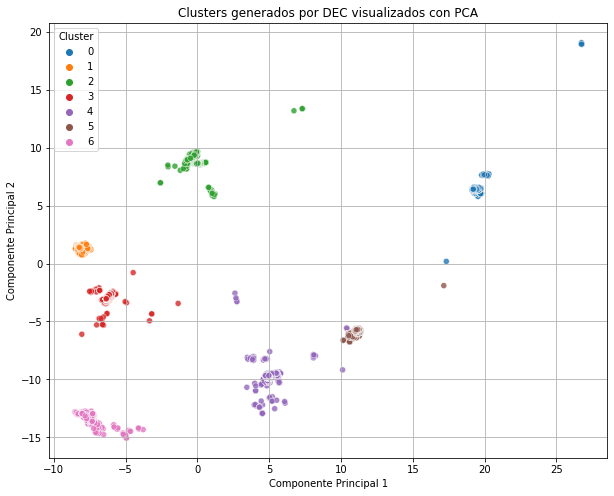

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Cargar embeddings desde CSV
df_embeddings = pd.read_csv('final_embeddings2.csv')

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(df_embeddings.drop('cluster', axis=1))

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(embeddings_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_embeddings['cluster']

# Graficar los resultados del PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='tab10',
    data=df_pca,
    legend='full',
    alpha=0.8
)

# Etiquetas claras del gráfico
plt.title('Clusters generados por DEC visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)

# Mostrar gráfico
plt.show()


# Resultados del Deep Embedding Clustering (DEC)

Los resultados obtenidos muestran una separación adecuada de los datos en clusters claramente definidos. Tras realizar múltiples experimentos con diversas configuraciones, se seleccionó finalmente una representación con:

- **7 dimensiones** en el embedding final.
- **5 clusters** como configuración óptima.

Esta combinación fue elegida debido a que ofrece una segmentación equilibrada y significativa, permitiendo distinguir efectivamente los comportamientos clave observados en los datos.


In [ ]:
import pandas as pd

# Cargar sólo la columna idCredito desde df10.csv
id_credito = pd.read_csv('df11.csv', usecols=['idCredito'])

# Cargar embeddings con sus clústeres
df_embeddings = pd.read_csv('final_embeddings.csv')

# Añadir idCredito al DataFrame de embeddings
df_embeddings['idCredito'] = id_credito.values

# Crear DataFrames separados por cluster
cluster_dfs = {}
for k in sorted(df_embeddings['cluster'].unique()):
    cluster_df = df_embeddings[df_embeddings['cluster'] == k].reset_index(drop=True)
    cluster_dfs[f'cluster_{k}'] = cluster_df

# Si quieres tenerlos como variables sueltas:
globals().update(cluster_dfs)  # Crea variables cluster_0, cluster_1, ..., cluster_7

# Ejemplo de acceso
print(cluster_0.head())  # o cualquier otro como cluster_3


         z0        z1        z2        z3        z4        z5        z6  \
0  3.971423  4.977245 -3.568946 -5.408882  0.974435  0.094703 -4.698849   
1  3.726069  4.828074 -3.920541 -5.440216  0.570596 -0.242287 -4.516553   
2  3.736261  4.807793 -3.928264 -5.435363  0.541221 -0.258654 -4.526913   
3  3.891268  5.161969 -3.583035 -5.142424  0.883612  0.026408 -4.727842   
4  3.730454  4.850163 -3.906983 -5.414714  0.582238 -0.234903 -4.537088   

         z7  cluster  idCredito  
0  4.935458        0      31375  
1  5.150434        0      41012  
2  5.144204        0      48419  
3  5.118119        0      48619  
4  5.158045        0      54884  


In [31]:
df11 = pd.concat([id_credito, df10], axis=1)

df11.to_csv('df11.csv', index=False)

In [27]:
cluster_0

,z0,z1,z2,z3,z4,z5,z6,z7,cluster,idCredito
0,3.971423,4.977245,-3.568946,-5.408882,0.974435,0.094703,-4.698849,4.935458,0,31375
1,3.726069,4.828074,-3.920541,-5.440216,0.570596,-0.242287,-4.516553,5.150434,0,41012
2,3.736261,4.807793,-3.928264,-5.435363,0.541221,-0.258654,-4.526913,5.144204,0,48419
3,3.891268,5.161969,-3.583035,-5.142424,0.883612,0.026408,-4.727842,5.118119,0,48619
4,3.730454,4.850163,-3.906983,-5.414714,0.582238,-0.234903,-4.537088,5.158045,0,54884
...,...,...,...,...,...,...,...,...,...,...
11086,3.515121,4.960346,-3.664239,-5.576512,0.703747,-0.213652,-4.577164,5.193161,0,755519
11087,3.496116,5.338944,-3.817004,-5.401238,0.560899,-0.387029,-4.632763,4.922305,0,755528
11088,3.492816,5.340337,-3.817977,-5.403143,0.564158,-0.385080,-4.628539,4.922514,0,755554
11089,3.492543,5.340112,-3.817699,-5.404156,0.562380,-0.385531,-4.629102,4.922798,0,755624


In [28]:
cluster_1

,z0,z1,z2,z3,z4,z5,z6,z7,cluster,idCredito
0,-5.932044,3.970110,-0.405345,-2.187471,1.757133,10.835419,1.336842,-4.836568,1,3674
1,-6.057991,3.905126,-0.405701,-2.178932,2.060101,10.914641,1.327012,-4.374627,1,4914
2,-6.026205,3.983215,-0.397886,-2.212853,1.982117,10.889174,1.276885,-4.553296,1,9066
3,-5.605802,3.842436,0.184561,-2.146791,2.223859,10.960842,0.821175,-4.514752,1,10983
4,-6.117273,3.977673,-0.372317,-2.049602,2.089508,10.917568,1.241526,-4.397034,1,18924
...,...,...,...,...,...,...,...,...,...,...
11904,-6.140370,4.146752,-0.562969,-1.933333,1.573720,10.724435,1.293722,-5.292035,1,755515
11905,-6.137397,4.156851,-0.564750,-1.932125,1.567433,10.725880,1.297864,-5.283863,1,755573
11906,-6.142108,4.123549,-0.524957,-1.947779,1.686569,10.773285,1.321786,-5.060443,1,755592
11907,-6.141008,4.124292,-0.524701,-1.946344,1.686123,10.773558,1.322393,-5.059254,1,755594


In [29]:
cluster_2

,z0,z1,z2,z3,z4,z5,z6,z7,cluster,idCredito
0,0.086322,-3.315539,-2.763942,3.592602,5.223696,-4.822713,-0.408371,-2.222490,2,42403
1,0.063228,-3.370320,-2.910924,3.504422,5.155110,-4.860443,-0.271095,-2.239658,2,45085
2,0.146549,-3.277166,-2.654492,3.632876,5.234975,-4.832354,-0.527783,-2.280522,2,49837
3,0.063547,-3.369528,-2.911083,3.504296,5.155458,-4.860632,-0.270832,-2.239976,2,57285
4,0.057334,-3.386828,-2.906446,3.506674,5.145485,-4.856025,-0.276223,-2.232043,2,59132
...,...,...,...,...,...,...,...,...,...,...
14063,0.042161,-3.317384,-2.818284,3.561168,5.255031,-4.817931,-0.328816,-2.173845,2,755541
14064,0.050345,-3.333445,-2.828833,3.558585,5.233502,-4.826640,-0.332469,-2.191824,2,755586
14065,-0.296311,-2.795660,-2.634034,3.585654,4.827102,-5.479625,-0.703351,-2.542193,2,755604
14066,0.051656,-3.328730,-2.829540,3.558109,5.235260,-4.826907,-0.331204,-2.193675,2,755650


In [30]:
cluster_3

,z0,z1,z2,z3,z4,z5,z6,z7,cluster,idCredito
0,5.570938,-3.201929,5.548962,-4.250512,-2.563046,-5.555917,5.183814,-3.386957,3,9872
1,5.132495,-3.244155,6.147041,-4.283246,-2.775680,-6.042230,4.833385,-2.723194,3,10439
2,5.131065,-3.245930,6.145825,-4.277418,-2.768995,-6.046246,4.835501,-2.726424,3,14257
3,5.375042,-3.283475,5.264219,-4.454911,-2.589809,-5.572672,5.382628,-3.346054,3,19635
4,5.272846,-3.177766,5.294635,-4.316777,-2.682664,-5.798722,5.524815,-3.242078,3,26030
...,...,...,...,...,...,...,...,...,...,...
6970,5.346694,-3.223638,5.295195,-4.302644,-2.698927,-5.747448,5.451927,-3.284757,3,755325
6971,5.346664,-3.224782,5.295261,-4.302419,-2.699778,-5.747932,5.451652,-3.285269,3,755368
6972,4.894196,-3.069449,5.403981,-5.030976,-2.572267,-5.833998,5.127373,-3.878099,3,755591
6973,5.360382,-3.302376,5.224875,-4.468293,-2.599503,-5.582324,5.410722,-3.348823,3,755612
